In [1]:
from JDOS_model import JDOS
from scipy.signal import savgol_filter
from pandas import read_csv
from numpy import array
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

In [2]:
input_data = read_csv('Si.csv', sep=r'\t')
input_data.head()

/tmp/ipykernel_5108/3100832178.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  input_data = read_csv('Si.csv', sep=r'\t')


,eV,e1,e2
0,4.96,-10.695024,11.477120
1,4.94,-10.959845,11.626560
2,4.92,-11.225401,11.802038
3,4.90,-11.504592,11.974306
4,4.88,-11.770858,12.185425


In [3]:
e1 = array(input_data['e1'][::-1])
e2 = array(input_data['e2'][::-1])
eV = array(input_data['eV'][::-1])

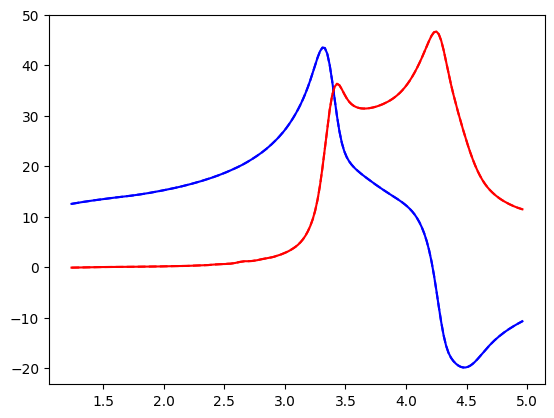

In [4]:
eV = savgol_filter(eV, 8, 2)
e1 = savgol_filter(e1, 8, 2)
e2 = savgol_filter(e2, 8, 2)
plt.plot(eV, e1, 'b')
plt.plot(eV, e2, 'r')
plt.plot(eV, UnivariateSpline(eV, e1, s=0)(eV), 'b--')
plt.plot(eV, UnivariateSpline(eV, e2, s=0)(eV), 'r--')

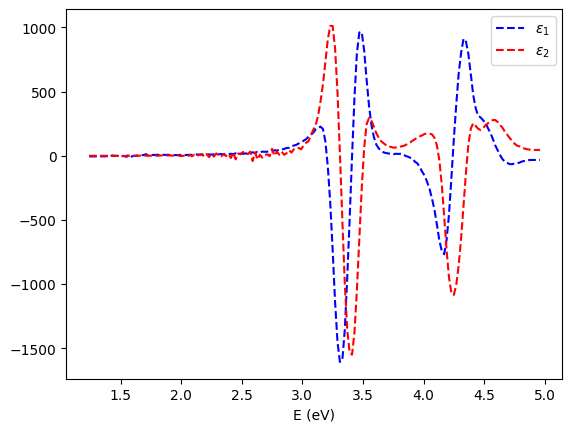

In [5]:
e1_second_der = (UnivariateSpline(eV, e1, s=0)).derivative(2)(eV)
e2_second_der = (UnivariateSpline(eV, e2, s=0)).derivative(2)(eV)
e1_second_der = savgol_filter(e1_second_der, 8, 0)
e2_second_der = savgol_filter(e2_second_der, 8, 0)
plt.plot(eV, e1_second_der, 'b--', label='$\epsilon_1$') 
plt.plot(eV, e2_second_der, 'r--', label='$\epsilon_2$')
plt.xlabel('E (eV)')
plt.legend()

In [6]:
jdos = JDOS()

/home/jbozek/JDOS/JDOS_model.py:154: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  input_data = read_csv(filepath, sep=separator)
/home/jbozek/.local/lib/python3.10/site-packages/scipy/optimize/_differentialevolution.py:387: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


It took: 4.7214167160000216
Result: [-0.5, 0.5, -0.07798116054635296, 3.2020861975332857, 7.139038752051476, 30.0, 3.3629395941252627, 3.95214845212183, 4.2605652213282985, 0.10391467827494573, 9.124140303015364, 0.09586054926958683, 2.488988543145674, -2.517122956146028, 2.216539195743388]
m: [-0.5, 0.5, -0.07798116054635296]
A: [3.2020861975332857, 7.139038752051476, 30.0]
E_ck: [3.3629395941252627, 3.95214845212183, 4.2605652213282985]
gamma: [0.10391467827494573, 9.124140303015364, 0.09586054926958683]
phi: [2.488988543145674, -2.517122956146028, 2.216539195743388]
Fitness value(max 0): 0.8588962804324678



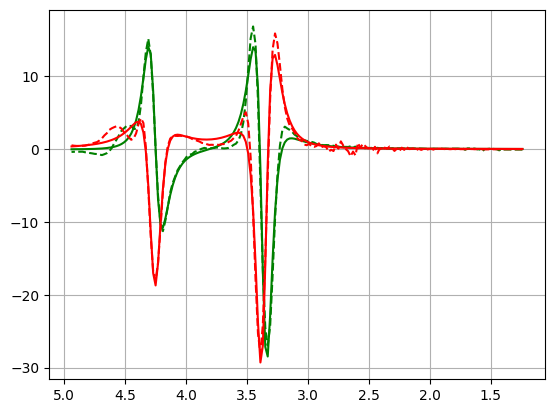

In [27]:
jdos.fitting_method(filepath='Si.csv',
                    left=-1,
                    right=0,
                    model_order=3,
                    filter_data=True,
                    plot=True,
                    discrete_m=False,
                    threads=8,
                    separator=r'\t',
                    window_length=8,
                    poly_order=2,
                    population_size=100)

In [ ]:
for _ in range(1000):
    jdos.fitting_method(filepath='Si.csv',
                        left=-1,
                        right=0,
                        model_order=4,
                        filter_data=True,
                        plot=False,
                        discrete_m=True,
                        threads=8,
                        separator=r'\t',
                        window_length=8,
                        poly_order=2,
                        population_size=100,
                        results_path='wyniki3')

Best of 1000 tries:

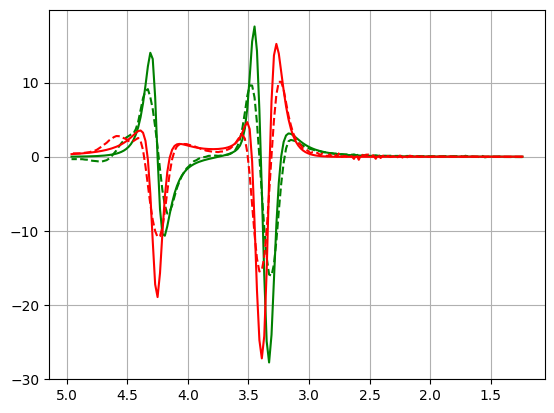

In [10]:
jdos.plot([-0.43194983351442273, -0.06500447617115279, -0.19632330965756972, -0.4496500021390667,
           4.223537865414949, 3.6934654889999785, 2.5062963906076625, 2.9814422433347905,
           4.573722413484097, 3.455245192875828, 4.260604883939465, 3.342074377379552,
           4.987103143841599, 0.08064600845396114, 0.09079642901776476, 0.11842548395728193,
           2.1945845769398944, -1.7306148237360348, -0.8995778170638766, 0.21003859974701852],
           True,
           eV,
           e1_second_der/100,
           e2_second_der/100)

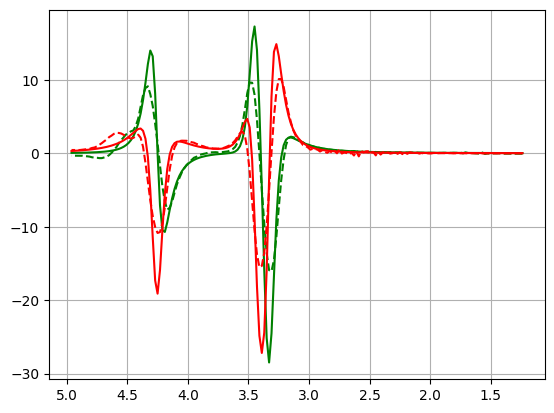

In [11]:
jdos.plot([-0.2753212806604248, 0.08930647162398997, 0.2660382475499605, -0.1078816084738653,
           2.907717876001991, 2.053721619332397, 3.0697953404548524, 2.512266304945785,
           3.445356058001589, 3.3330576351182386, 5.380136865723947, 4.259832962936328,
           0.08838576026377785, 0.0939129033450345, 9.351956699977118, 0.09056396037019322,
           1.5842596217817397, 3.14, -1.2055420582272824, -0.8908829934383671],
           True,
           eV,
           e1_second_der/100,
           e2_second_der/100)